<a href="https://colab.research.google.com/github/TivsLThree/CAP-4630-Artificial-Intelligence/blob/master/Homework/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

### Generate and visualize data

In [0]:
import random
import numpy as np
def get_random_data(w, b, mu, sigma, m):
  features = np.zeros((m,2));
  labels = np.zeros((m,1));
  for i in range(m):
    c = random.randint(0,1);
    x_1 = random.random();
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n
    features[i] = [x_1, x_2]
    labels[i] = c;
  return (features, labels)
r = get_random_data(5,1,2,0.75,2000)

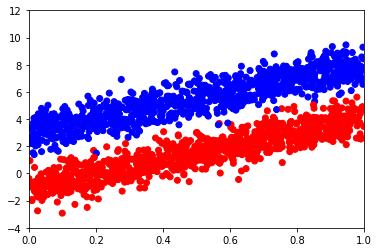

In [217]:
import matplotlib.pyplot as plt

def display_random_data(data, labels):
  c = ["r" if x == 1 else "b" for x in labels]
  plt.scatter(data[:,0], data[:,1], color = c);
  plt.xlim(-0,1)
  plt.ylim(-4,12)
display_random_data(r[0], r[1])

### Seperate training and testing data

In [218]:
i = int(0.8 * len(r[0])) # 80%
x_train, y_train = r[0][:i], r[1][:i] # 80%
x_test, y_test = r[0][i:], r[1][i:] # 20%
x_train.shape

(1600, 2)

# Problem 2

In [219]:
%tensorflow_version 2.x
import random;
import numpy as np
import scipy as sp
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.python.keras.models import Model

model = models.Sequential()
model.add(layers.Dense( 1,input_shape=(x_train[0].shape), activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="sgd");
h = model.fit(x_train, y_train, epochs = 125)
results = model.predict(x_test);
sum([1 if b == (0 if a < 0.5 else 1) else 0 for a,b in zip(results, y_test)]) / len(y_test)

Epoch 1/125
50/50 [==============================] - 0s 1ms/step - loss: 2.4043
Epoch 2/125
50/50 [==============================] - 0s 1ms/step - loss: 0.6067
Epoch 3/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4977
Epoch 4/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4771
Epoch 5/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4592
Epoch 6/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4426
Epoch 7/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 8/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4132
Epoch 9/125
50/50 [==============================] - 0s 1ms/step - loss: 0.4001
Epoch 10/125
50/50 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 11/125
50/50 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 12/125
50/50 [==============================] - 0s 1ms/step - loss: 0.3664
Epoch 13/125
50/50 [=================

0.99

$$\text{In order to find our seperating line, we take the weights from the node which returns a w1, w2, and b}$$
$$\text{Then, solve the following function for } x_2$$
$$w_1 * x_1 + w_2 * x_2 + b = 0$$
$$x_2=  -\frac{w_1 * x_1 + b} {w_2}$$

[array([[ 3.7915938],
       [-1.3314729]], dtype=float32), array([2.6381574], dtype=float32)]


(2,)

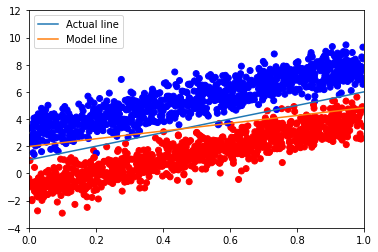

In [220]:
x = np.linspace(0,1,100)
y = np.linspace(-5,10,100)
# 5,1,2,0.75,500
# w, b, mu, sigma, m
#x_2= -(w1 x1 + b) / w2
def f (x):
  return  5 * x + 1;
def g (x, w):
  return -(w[0][0] * x + w[1][0]) / w[0][1];
display_random_data(r[0], r[1])
w = model.layers[0].get_weights()
plt.plot(x, f(x), label='Actual line');
plt.plot(x, g(x,w), label = 'Model line')
plt.legend()
print(model.layers[0].get_weights())
x_train[0].shape

### Heatmap of the decision boundary 

(400,)


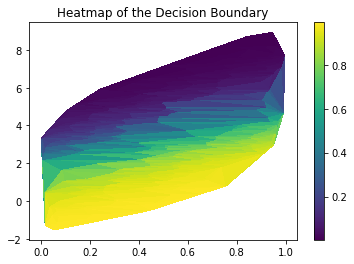

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
X = np.reshape(x_test[:,0], newshape=(x_test[:,0].shape[0], 1))
X = np.array([x[0] for x in X]);
Y = np.reshape(x_test[:,1], newshape=(x_test[:,1].shape[0], 1))
Y = np.array([y[0] for y in Y])
Z = np.array([z[0] for z in results]);
print(Y.shape)
data = pd.DataFrame(data={'x':X,'y':Y,'z':Z})
#data = data.pivot(index='y', columns='x', values='z')
#sns.heatmap(data);
#plt.show()
fig1, ax1 = plt.subplots()
tpc = plt.tripcolor(data.x,data.y,data.z, shading='flat')
ax1.set_title('Heatmap of the Decision Boundary')
fig1.colorbar(tpc)

# Problem 3

In [0]:

class Model:
  def __init__(self, lr=0.1, i_count=2000, verbose=True):
    self.verbose = verbose
    self.lr = lr;
    self.i_count = i_count;
  def __sigmoid(self, z):
    return 1/(1+np.exp(-z))
  def __loss(self, a, y):
    return (-y * np.log(a) - (1 - y) * np.log(1 - a)).mean()
  def fit(self, x, y):
    losses = []
    b = np.ones((x.shape[0], 1))
    x = np.concatenate((b,x), axis=1);
    
    self.theta = np.zeros((x.shape[1],1))

    for i in range(self.i_count):
      z = np.dot(x, self.theta)
      a = self.__sigmoid(z);
      # (a - y) * x_j
      gradient = np.dot(x.T, a - y) / y.shape[0]
      self.theta -= self.lr * gradient
      if self.verbose and i % 10 == 0:
        z = np.dot(x, self.theta);
        a = self.__sigmoid(z);
        loss = self.__loss(a, y);
        losses.append(loss)
    return losses
  # Returns the predictions and loss as well
  def predict(self, x, y):
    b = np.ones((x.shape[0], 1));
    x = np.concatenate((b,x), axis=1);
    res = self.__sigmoid(np.dot(x, self.theta));
    return (np.array([i[0] for i in res ]), self.__loss(res, y))
m = Model()
# reshape everything to fit correctly
X = np.reshape(X, (-1,1))
Y = np.reshape(Y, (-1,1))
Z = np.reshape(Z, (-1,1))
x = np.concatenate((X,Y), axis = 1)
losses = m.fit(x, Z)

### Graph the loss from training

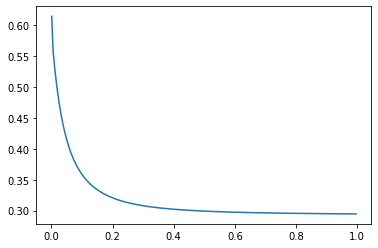

In [295]:
plt.plot(np.linspace(np.min(X),np.max(X), len(losses)), losses)

### Visualize Trained Model

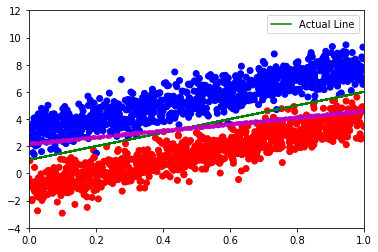

In [296]:
def h (x, w):
  return -(w[1][0] * x + w[0][0]) / w[2][0];
fig1, ax1 = plt.subplots()
display_random_data(r[0], r[1])
w = m.theta
ax1.plot(x, f(x), 'g', label='actual line');
ax1.plot(x, h(x,w), 'm.', label = 'model line')
ax1.legend(['Actual Line'])
# Purple line is the deciding line created from training

### Heatmap for trained model

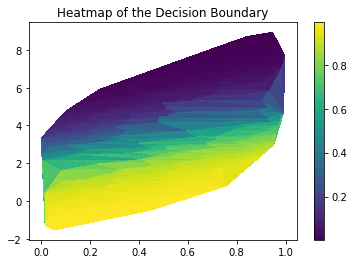

In [298]:
Z, loss = m.predict(x, Z)
data = pd.DataFrame(data={'x':list(X),'y':list(Y),'z':list(Z)})

fig1, ax1 = plt.subplots()
tpc = plt.tripcolor(data.x,data.y,data.z, shading='flat')
ax1.set_title('Heatmap of the Decision Boundary')
fig1.colorbar(tpc)


### Run on testing data and get accuracy/loss

In [300]:
res, loss = m.predict(x_test, y_test)
# If the prediction is > 0.5 and the actual value was 1, success!
# similar for 0
acc = sum ([1 if (a >= 0.5 and b == 1) or (a < 0.5 and b == 0) else 0 for a,b in zip(res, y_test)]) / y_test.shape[0]
print("Accuracy: ", acc)
print("Loss: ", loss)

Accuracy:  0.9775
Loss:  0.1474744831213065
